In [1]:
import numpy as np
import json

In [2]:
influence_values = np.load('outputs/MNIST/test/image_classifier/influence_function_softmax/influence_values.npy')
training_idx, validation_idx = [json.load(open(f'outputs/MNIST/test/image_classifier/influence_function_softmax/{x}_idx.json')) for x in ['training', 'validation']]

In [3]:
from influence_info.dataset_readers.image_reader import ImageReader
reader = ImageReader(as_is=True)
training_data = {i: (image, label) for (i, image, label) in list(reader._read('train'))}
validation_data = {i: (image, label) for (i, image, label) in list(reader._read('dev'))}

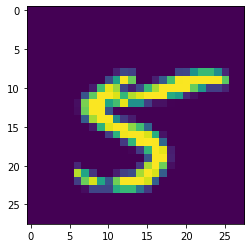

---
1061.48
632.85486
470.13217
437.46545
369.14902


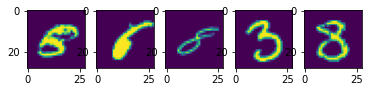

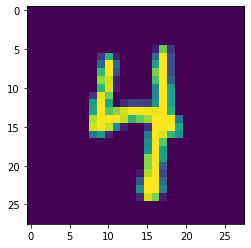

---
2.2814615
2.1533914
1.7479942
1.6153011
1.4212279


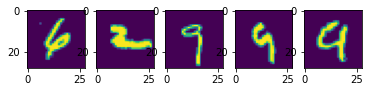

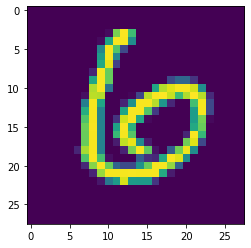

---
91.89139
82.73077
34.53384
30.828018
26.24713


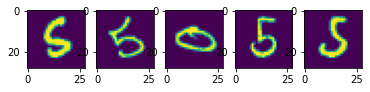

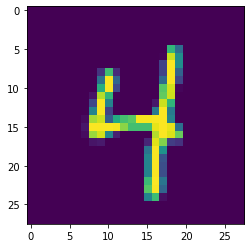

---
3.3098116
2.7706318
1.9613303
1.7504376
1.7379246


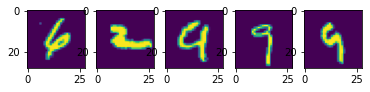

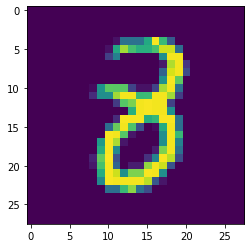

---
46723.492
41950.31
39314.914
27186.965
23813.404


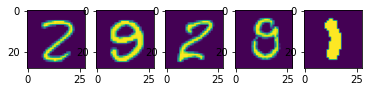

In [4]:
import random
import matplotlib.pyplot as plt

for i in range(5) :
    i = random.randint(0, 450)
    v = validation_data[i]
    plt.imshow(v[0][0])
    plt.show()
    print("---")
    vals = influence_values[i, :]
    top = np.argsort(vals)[-5:]
    fig = plt.figure()
    for k, j in enumerate(top[::-1]) :
        print(vals[j])
        plt.subplot(1, 5, k + 1)
        plt.imshow(training_data[j][0][0])
    plt.show()
    print("==="*10)

In [ ]:
influence_values.shape